In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv("h&m/handm.csv")
df = data.copy()
df.head()

,Unnamed: 0,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,details,materials
0,0,834333001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.08343330...,49.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes with open lacing at front. Canvas ...,COMPOSITION\nSole:Thermoplastic rubber 100%\nU...
1,1,1258600003,Pile-Lined Slippers,H&M,https://www2.hm.com/en_us/productpage.12586000...,24.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_slippers,Slippers in napped fabric. Decorative seam at ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
2,2,1036812001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.10368120...,56.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes in soft faux suede with open lacin...,COMPOSITION\nLining and insole:Cotton 100%\nUp...
3,3,1112924002,Fleece-lined Slippers,H&M,https://www2.hm.com/en_us/productpage.11129240...,29.99,Available,False,Dark blue,True,393B47,Bright blue|Cobalt blue|Dark blue|Indigo|Navy ...,False,men_shoes_slippers,Slippers in woven fabric with a moccasin seam ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
4,4,1119476020,Sneakers,H&M,https://www2.hm.com/en_us/productpage.11194760...,29.99,Available,False,White,True,FFFFFF,NaN,False,men_shoes_sneakers,"Sneakers with a padded upper edge and tongue, ...",COMPOSITION\nLining:Polyester 100%\nUpper:Poly...


### Columns in the dataset

In [6]:
df.columns

Index(['Unnamed: 0', 'productId', 'productName', 'brandName', 'url', 'price',
       'stockState', 'comingSoon', 'colorName', 'isOnline', 'colors',
       'colorShades', 'newArrival', 'mainCatCode', 'details', 'materials'],
      dtype='object')

### Number of rows in the df

In [7]:
len(df)

9677

### Basic Exploration

In [13]:
print("Shape of the dataframe", df.shape)
print("-"*100)
print("Columns of the dataframe", df.columns.to_list())
print("-"*100)
print("Data Integrity Information", df.info())
print("-"*100)
print("Checking for null values in each column", df.isna().sum())
print("-"*100)
print("Checking for duplicate records", df.duplicated().sum())
print("-"*100)
print("Statistical summary of numerical columns", df.describe())

Shape of the dataframe (9677, 16)
----------------------------------------------------------------------------------------------------
Columns of the dataframe ['Unnamed: 0', 'productId', 'productName', 'brandName', 'url', 'price', 'stockState', 'comingSoon', 'colorName', 'isOnline', 'colors', 'colorShades', 'newArrival', 'mainCatCode', 'details', 'materials']
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colo

In [14]:
# Deleting unnecessary columns, "Unnamed : 0"
# Renaming details column to "descriptions"

df.drop("Unnamed: 0", axis = 1, inplace = True)
df.rename(columns = {"details" : "descriptions"}, inplace = True)
print(df.columns.to_list())

['productId', 'productName', 'brandName', 'url', 'price', 'stockState', 'comingSoon', 'colorName', 'isOnline', 'colors', 'colorShades', 'newArrival', 'mainCatCode', 'descriptions', 'materials']


In [15]:
df.head()

,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,descriptions,materials
0,834333001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.08343330...,49.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes with open lacing at front. Canvas ...,COMPOSITION\nSole:Thermoplastic rubber 100%\nU...
1,1258600003,Pile-Lined Slippers,H&M,https://www2.hm.com/en_us/productpage.12586000...,24.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_slippers,Slippers in napped fabric. Decorative seam at ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
2,1036812001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.10368120...,56.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes in soft faux suede with open lacin...,COMPOSITION\nLining and insole:Cotton 100%\nUp...
3,1112924002,Fleece-lined Slippers,H&M,https://www2.hm.com/en_us/productpage.11129240...,29.99,Available,False,Dark blue,True,393B47,Bright blue|Cobalt blue|Dark blue|Indigo|Navy ...,False,men_shoes_slippers,Slippers in woven fabric with a moccasin seam ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
4,1119476020,Sneakers,H&M,https://www2.hm.com/en_us/productpage.11194760...,29.99,Available,False,White,True,FFFFFF,NaN,False,men_shoes_sneakers,"Sneakers with a padded upper edge and tongue, ...",COMPOSITION\nLining:Polyester 100%\nUpper:Poly...


### Data Visualisation

In [18]:
numerical_features = df.select_dtypes(include = ["int64", "float64"]).columns
print("Numerical features are: \n", numerical_features)

Numerical features are: 
 Index(['productId', 'price'], dtype='object')


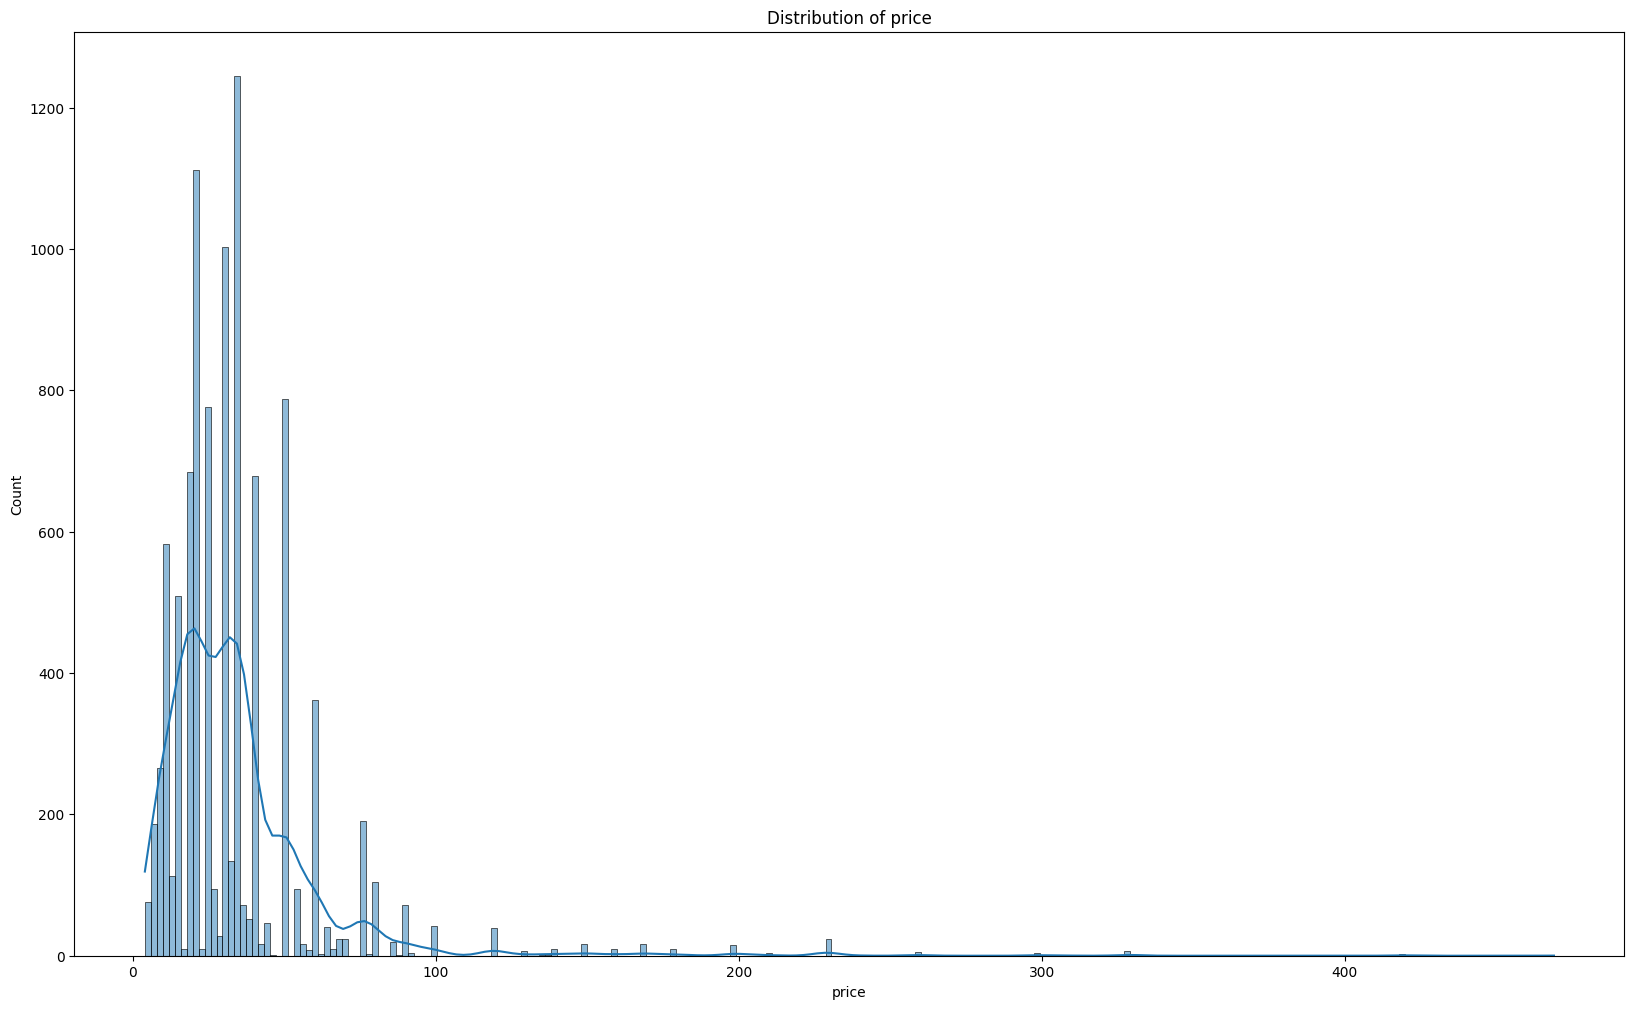

In [20]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

plt.figure(figsize = (20, 12))
sns.histplot(df['price'], kde = True)
plt.title("Distribution of price")
plt.show()

In [21]:
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical features are \n", categorical_features)

Categorical features are 
 Index(['productName', 'brandName', 'url', 'stockState', 'comingSoon',
       'colorName', 'isOnline', 'colors', 'colorShades', 'newArrival',
       'mainCatCode', 'descriptions', 'materials'],
      dtype='object')


In [22]:
brandName_price_relationship = df.groupby('brandName')['price'].agg(['mean', 'median', 'count']).sort_values(by = 'mean', ascending = False)
print(brandName_price_relationship)

                mean  median  count
brandName                          
H&M        34.215088   29.99   9677


In [26]:
# relationship between price and name of product

top_products = df['productName'].value_counts().head(50).index.to_list()
print(top_products)

product_price_relation = df[df['productName'].isin(top_products)].groupby('productName')['price'].agg(['mean', 'median', 'count'])
print(product_price_relation)

['Ribbed Tank Top', 'Padded Triangle Bikini Top', 'Loose Fit Hoodie', 'Loose Fit Sweatshirt', 'Loose Fit Printed Hoodie', 'Oversized Printed T-shirt', 'Sneakers', 'Fitted T-shirt', 'Nail Polish', 'Tie Bikini Bottoms', 'Loose Fit Printed T-shirt', 'Eyeshadow', 'Gel Nail Polish', 'Sweater', 'Socks', 'Printed T-shirt', 'Bikini Bottoms', 'Oversized T-shirt', 'Cheeky Bikini Bottoms', 'Padded Bikini Top', 'Wide High Jeans', 'Sweatshorts', 'Wide-cut Pull-on Pants', 'Rib-Knit Beanie', 'Warm-lined Boots', '5-pack Socks', 'Loose Fit T-shirt', 'Ribbed T-shirt', 'Linen-blend Shirt', 'Straight Regular Jeans', 'Oversized Printed Sweatshirt', 'Regular Fit Textured Shirt', 'Fine-Knit Sweater', 'Slim Fit Suit Pants', 'Baggy Jeans', 'Oversized Turtleneck Sweater', 'Sports Tank Top in DryMove™', 'Regular Fit Sports Shirt in DryMove™', 'Slim Fit Pants', 'Rib-Knit Socks', 'Loose Jeans', 'Flared Low Jeans', 'Oversized Hooded Jacket', 'Mock Turtleneck Sweater', 'Oversized Sweatshirt', 'Baggy Wide Low Jeans',

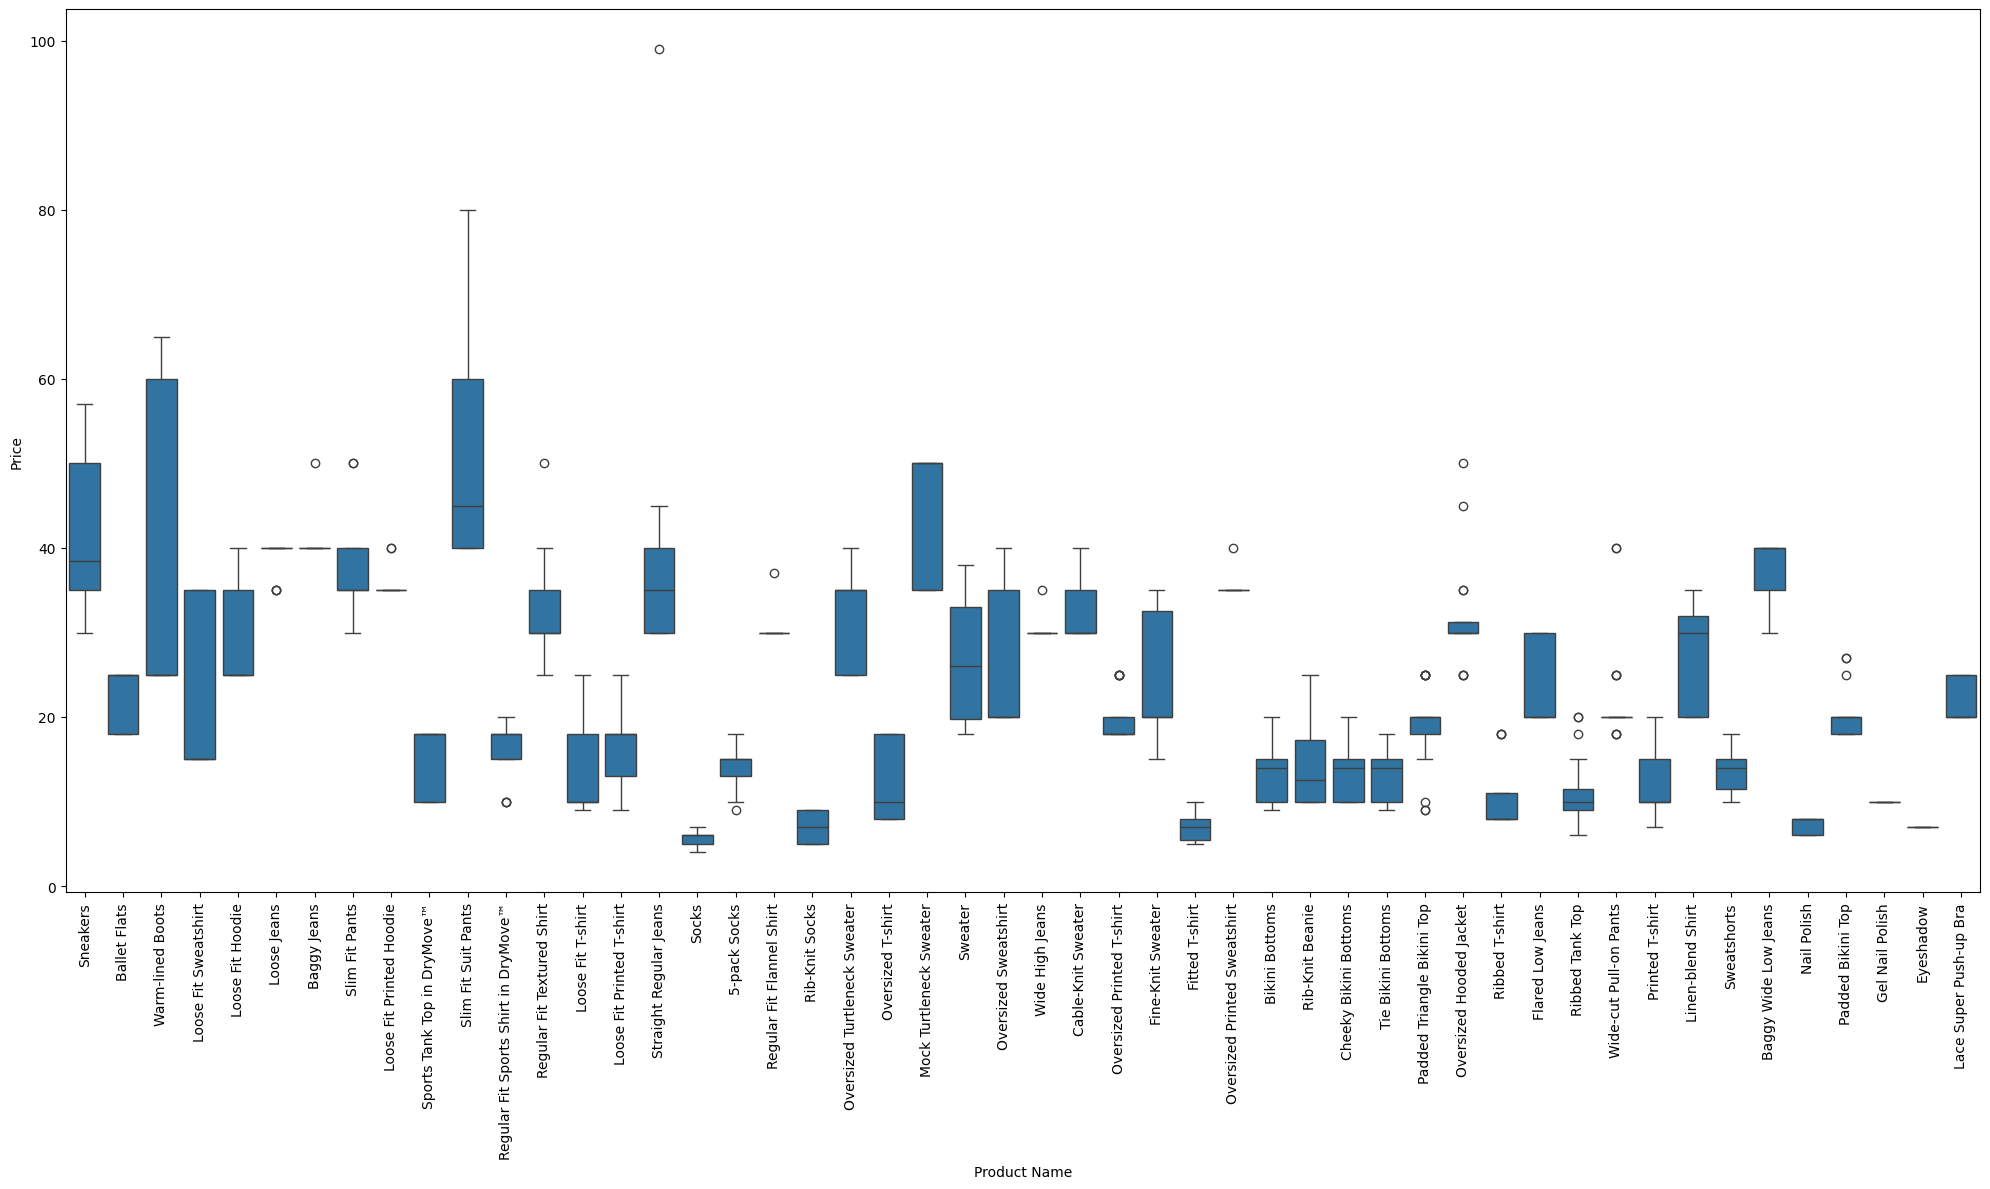

In [28]:
filtered_products = df[df['productName'].isin(top_products)]
plt.figure(figsize = (20, 12))
sns.boxplot(data = filtered_products, x = 'productName', y = 'price')
plt.xticks(rotation = 90)
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [29]:
# relationship between stockState and price
stockState_price_relation = df.groupby('stockState')['price'].agg(['mean','median','count'])
stockState_price_relation

,mean,median,count
stockState,,,
Available,34.215088,29.99,9677
